## Predictive Churn Model

The objective of this assignment is to build a predictive model that can predict customer churn for a given company.We will use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#delimiter is used to display the data in correct format 
train = pd.read_csv("bank.csv",sep=';')
test = pd.read_csv("test.csv",sep=',')
train.shape

(4521, 17)

In [3]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# information about the dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# to check the number of null values in the dataset 
train.isna().sum().sum()

0

In [7]:
# to count the number of churns
train.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [8]:
churn_numeric = {'yes':1, 'no':0}
train.y.replace(churn_numeric, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


## categorical feature analysis 


In [9]:
# let's explore other categorical features
clmn = train.select_dtypes(include=['object']).columns
clmn

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

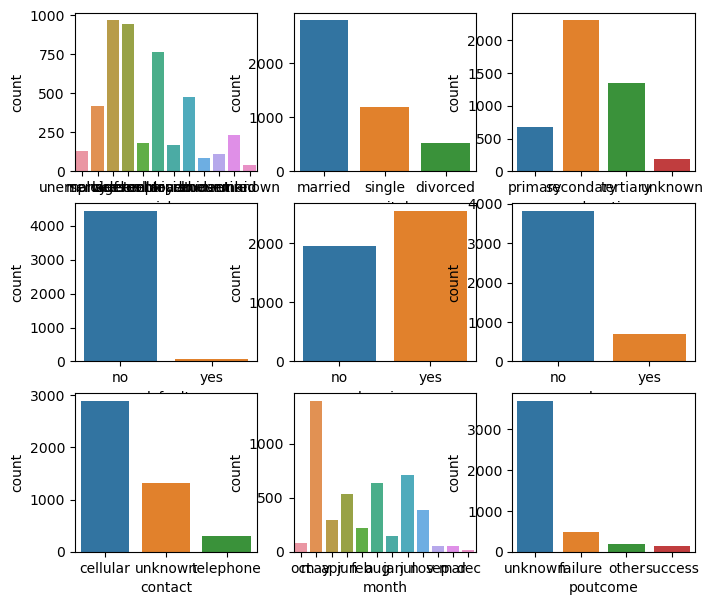

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(8, 7))

sns.countplot(x="job", data=train, ax=axes[0,0])
sns.countplot(x="marital", data=train, ax=axes[0,1])
sns.countplot(x="education", data=train, ax=axes[0,2])
sns.countplot(x="default", data=train, ax=axes[1,0])
sns.countplot(x="housing", data=train, ax=axes[1,1])
sns.countplot(x="loan", data=train, ax=axes[1,2])
sns.countplot(x="contact", data=train, ax=axes[2,0])
sns.countplot(x="month", data=train, ax=axes[2,1])
sns.countplot(x="poutcome", data=train, ax=axes[2,2])


In [11]:
clmns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']
for i in clmns:
        g = train[[i,'y']].groupby([i]).sum()/train.shape[0]
        s = train[[i,'y']].groupby([i]).mean()
        print(s)
        print("*********************")
        print(g)

                      y
job                    
admin.         0.121339
blue-collar    0.072939
entrepreneur   0.089286
housemaid      0.125000
management     0.135191
retired        0.234783
self-employed  0.109290
services       0.091127
student        0.226190
technician     0.108073
unemployed     0.101562
unknown        0.184211
*********************
                      y
job                    
admin.         0.012829
blue-collar    0.015262
entrepreneur   0.003318
housemaid      0.003097
management     0.028976
retired        0.011944
self-employed  0.004424
services       0.008405
student        0.004203
technician     0.018359
unemployed     0.002875
unknown        0.001548
                 y
marital           
divorced  0.145833
married   0.099035
single    0.139632
*********************
                 y
marital           
divorced  0.017032
married   0.061270
single    0.036939
                  y
education          
primary    0.094395
secondary  0.106245
tertiary   0.1

In [12]:
# clmns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
#        'month', 'poutcome']
# for i in clmns:
#     s = train[[i,'y']].groupby([i]).
#     print(s)

In [13]:
# relation between job and marital status with campaign 
s = train[['job','marital','y']]
s.groupby(['job','marital']).mean().sort_values('y',ascending=False).head(5)


,,y
job,marital,
retired,divorced,0.372093
self-employed,divorced,0.333333
housemaid,divorced,0.307692
student,single,0.243243
retired,married,0.204545


In [14]:
# relation of housing loan and personal loan on campaing 
s = train[['housing','loan','y']]
print(s.groupby(['loan','housing']).mean().sort_values('y',ascending=False))

                     y
loan housing          
no   no       0.168754
     yes      0.090571
yes  no       0.063158
     yes      0.061576


## Observations
- retired people and student are more likely to respond positively to campaing
- married people are less likely to respond to the campaign
- people with tertiary level of education are more receptive to campaign 
- credit in default does not have any significant impact on the campaign 
- people who does not have housing loan are more likely to respond positively to campaign 
- people without any personal loan are more likely to subscribe a term deposit 
- people who subscribed to term deposit after the previous campaign are more likely to subscribe once again 
- cellular and telephonic contacts has positive impact on the subscriptions of the term deposits 
- after every quarter the subscriptions has increased this shows that this is the appropriate time to do the campaign
- single students along with divorced (retired , self-employed, housemaid) are highly potential subscribers


## Continuous feature Analysis:


In [15]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [16]:
s2 = train.select_dtypes(include = 'int64')
s2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

<AxesSubplot:xlabel='previous', ylabel='Density'>

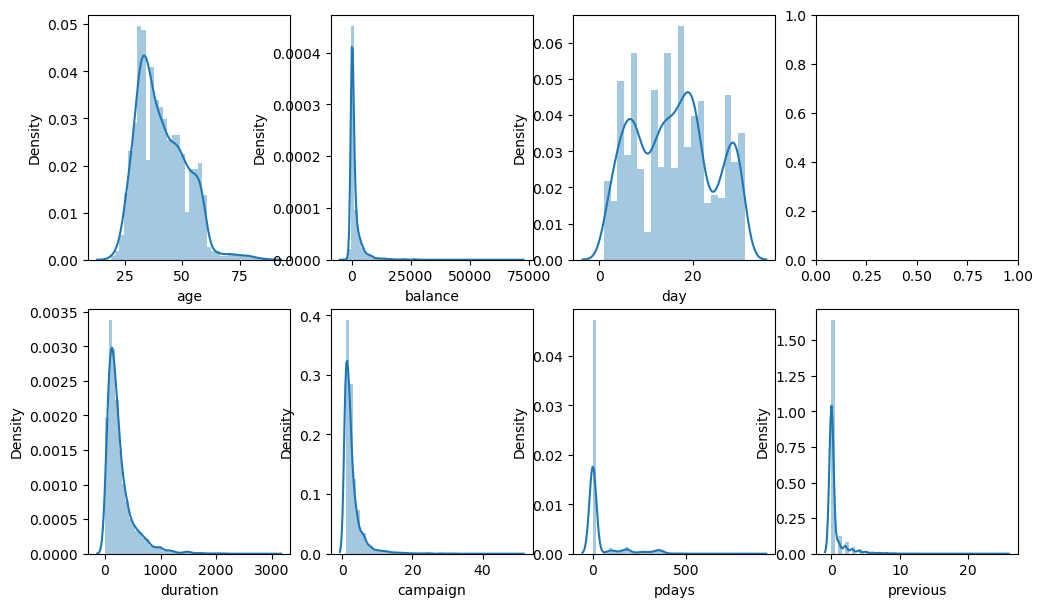

In [17]:
fig, axes = plt.subplots(2,4, figsize=(12, 7))
sns.distplot(train["age"], ax=axes[0,0])
sns.distplot(train["balance"], ax=axes[0,1])
sns.distplot(train["day"], ax=axes[0,2])
sns.distplot(train["duration"], ax=axes[1,0])
sns.distplot(train["campaign"], ax=axes[1,1])
sns.distplot(train["pdays"], ax=axes[1,2])
sns.distplot(train["previous"], ax=axes[1,3])

In [18]:
train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y']].groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [19]:
train[['balance','education']].groupby(['education']).mean()

,balance
education,
primary,1411.544248
secondary,1196.814397
tertiary,1775.423704
unknown,1701.245989


In [20]:
train[['campaign','y']].groupby(['y']).mean()

,campaign
y,
0,2.862250
1,2.266795


<AxesSubplot:>

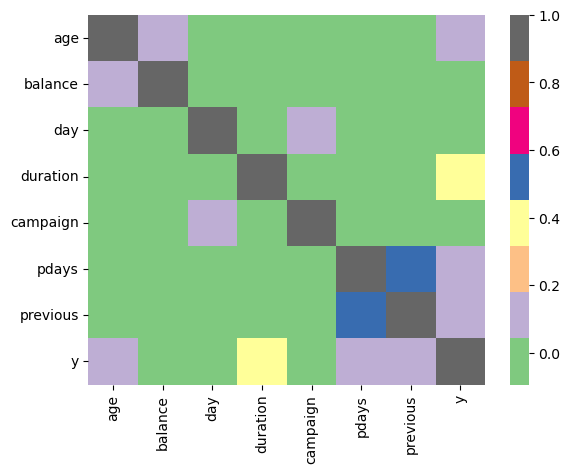

In [21]:
w = train[['age','balance','day','duration','campaign','pdays','previous','y']].corr()
sns.heatmap(w,cmap='Accent')
# plt.show()

In [22]:
##### can we drop the balance data as this and the education level both represents the same things 
# so can we drop days , balance , campaign ?????? 

## Observations
- people with higher education tend to have higher balance hence a potential subscriber for term deposit 
- higher the number of contacts made there is increased chances of subscription of term deposit 
- the number of contact made during the campaign doesnot have much impact on the subscription of the term deposit 
- the campaing doesnot seen to have much effect on the subscription

## Data Preprocessing


In [23]:
# change categorical data to numerical one using dummy columns:
# data1 = train.drop(columns=['default','housing','day','campaign','duration'])
columnss = ['job', 'marital', 'education','loan', 'contact','month', 'poutcome','housing']
data1 = train.drop(columns=['default','balance','day','campaign'])

data1 = pd.get_dummies(data1,columns = columnss,drop_first=True)
data1.shape

(4521, 39)

In [24]:
data1

,age,duration,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_yes
0,30,79,-1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,220,339,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,35,185,330,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,30,199,-1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
4,59,226,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,329,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4517,57,153,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4518,57,151,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,129,211,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
X = data1.loc[:,data1.columns != 'y']
y = data1['y']


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Resampling

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print("Before",counter)
# oversampling the train dataset using SMOTE 
smt = SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

counter =Counter(y_train_sm)
print("After",counter)

Before Counter({0: 3193, 1: 423})
After Counter({0: 3193, 1: 3193})


<AxesSubplot:>

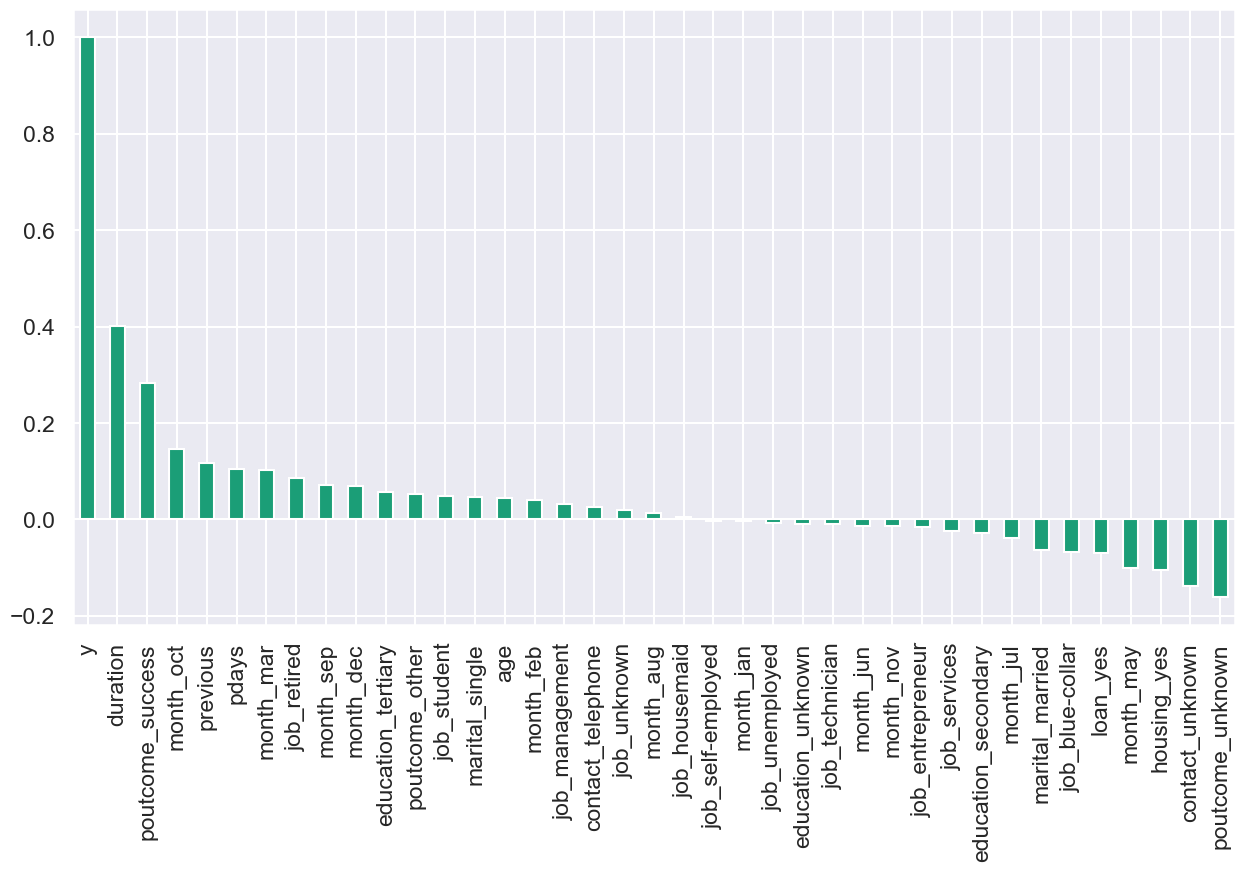

In [28]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
data1.corr()['y'].sort_values(ascending = False).plot(kind='bar')


### Scaling Continuous Variable:


In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_sm[X_train_sm.columns] = sc.fit_transform(X_train_sm[X_train_sm.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])
type(X_test)

pandas.core.frame.DataFrame

## Logistic regression 

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg=LogisticRegression()
logreg.fit(X_train_sm,y_train_sm)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))
print(classification_report(y_test,prediction_logreg))

0.8729281767955801
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       807
           1       0.40      0.37      0.39        98

    accuracy                           0.87       905
   macro avg       0.66      0.65      0.66       905
weighted avg       0.87      0.87      0.87       905



## Random Forest using RandomCV

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_c=RandomForestClassifier()

In [32]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [33]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train_sm,y_train_sm)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))
print(classification_report(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.8s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.8s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

## XGBoost

In [34]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [35]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_sm, y_train_sm), ( X_test, y_test)]
    
    clf.fit(X_train_sm, y_train_sm,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [36]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_sm, y_train_sm)
prediction_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))
print( classification_report(y_test,prediction_xgb))

0.8917127071823204
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       807
           1       0.50      0.44      0.47        98

    accuracy                           0.89       905
   macro avg       0.72      0.69      0.70       905
weighted avg       0.89      0.89      0.89       905



## Gradient Boosting 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train_sm,y_train_sm)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))



Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Train Score: 0.914513800939418
Test Score: 0.8939226519337017


In [38]:
grid = {'max_depth':[1,2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train_sm,y_train_sm)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))



Best Parameters: {'max_depth': 7}
Train Score: 0.9243767292369935
Test Score: 0.887292817679558


In [39]:

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,max_depth=4, random_state=42).fit(X_train_sm, y_train_sm)
clf.score(X_test, y_test)
prediction_clf = clf.predict(X_test)
print(accuracy_score(y_test,prediction_clf))
# print("Classification report - n", classification_report(y_test,prediction_clf))
print(classification_report(y_test,prediction_clf))

0.8895027624309392
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       807
           1       0.49      0.49      0.49        98

    accuracy                           0.89       905
   macro avg       0.71      0.71      0.71       905
weighted avg       0.89      0.89      0.89       905



In [40]:
from sklearn.metrics import roc_curve

# roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_logreg[:,1], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_logreg, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prediction_cv, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, prediction_xgb, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, prediction_clf, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


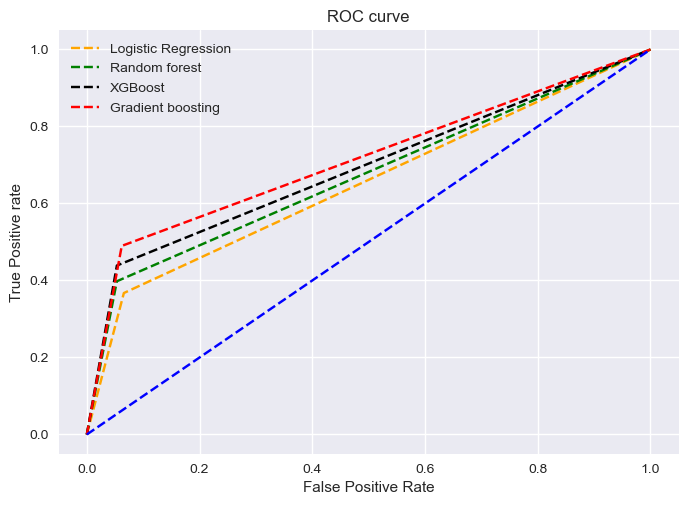

In [41]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='XGBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Gradient boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Downsampling 

In [42]:
y_majority = data1[data1.y==0]
y_minority = data1[data1.y==1]
data1.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [43]:
from sklearn.utils import resample
y_majority_ds = resample(y_majority,
             n_samples=data1.y.value_counts()[1],
             random_state=42)

print(y_majority_ds.shape)

(521, 39)


In [44]:
df_ds = pd.concat([y_minority, y_majority_ds])
df_ds.y.value_counts()
df_ds.shape

(1042, 39)

In [45]:
X = df_ds.loc[:,df_ds.columns != 'y']
y = df_ds['y']
X.shape

(1042, 38)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Scaling Continuous features

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])


## Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logregg=LogisticRegression()
logregg.fit(X_train,y_train)
prediction_logregg=logregg.predict(X_test)
print(accuracy_score(y_test,prediction_logregg))
print(classification_report(y_test,prediction_logregg))

0.7894736842105263
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        98
           1       0.86      0.72      0.78       111

    accuracy                           0.79       209
   macro avg       0.80      0.79      0.79       209
weighted avg       0.80      0.79      0.79       209



## Random Forest using RandomCV

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc=RandomForestClassifier()

In [50]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [51]:
randomf_cv=RandomizedSearchCV(rfc,param_grid,cv=3,verbose=2,random_state=42)
randomf_cv.fit(X_train,y_train)
bestt_random=randomf_cv.best_estimator_
predictionn_cv=bestt_random.predict(X_test)
print(accuracy_score(y_test,predictionn_cv))
print(classification_report(y_test,predictionn_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.5s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.5s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

## XGBoost

In [52]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [53]:
def objective(space):
    clff=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clff.fit(X_train_sm, y_train_sm,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clff.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [54]:
from xgboost import XGBClassifier
xgbb_model = XGBClassifier()
xgbb_model.fit(X_train, y_train)
prediction_xgbb = xgbb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgbb))
print( classification_report(y_test,prediction_xgbb))

0.8229665071770335
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        98
           1       0.84      0.83      0.83       111

    accuracy                           0.82       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.82      0.82      0.82       209



## Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gbb = GradientBoostingClassifier()

gbb_cv = GridSearchCV(gb, grid, cv = 4)

gbb_cv.fit(X_train,y_train)

print("Best Parameters:",gbb_cv.best_params_)

print("Train Score:",gbb_cv.best_score_)

print("Test Score:",gbb_cv.score(X_test,y_test))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.8236221015826279
Test Score: 0.8277511961722488


In [56]:
grid = {'max_depth':[1,2,3,4,5,6,7] }

gbb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gbb_cv = GridSearchCV(gbb, grid, cv = 4)

gbb_cv.fit(X_train,y_train)

print("Best Parameters:",gbb_cv.best_params_)

print("Train Score:",gbb_cv.best_score_)

print("Test Score:",gbb_cv.score(X_test,y_test))



Best Parameters: {'max_depth': 5}
Train Score: 0.8260086952521162
Test Score: 0.8133971291866029


In [57]:
X_test.shape

(209, 38)

In [58]:
gbclf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05,max_depth=4, random_state=42).fit(X_train, y_train)
gbclf.score(X_test, y_test)
prediction_clfgb = gbclf.predict(X_test)
print(accuracy_score(y_test,prediction_clfgb))
# print("Classification report - n", classification_report(y_test,prediction_clf))
print(classification_report(y_test,prediction_clfgb))

0.8277511961722488
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        98
           1       0.83      0.85      0.84       111

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



In [59]:
from sklearn.metrics import roc_curve

# roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_logreg[:,1], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_logregg, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictionn_cv, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, prediction_xgbb, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, prediction_clfgb, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


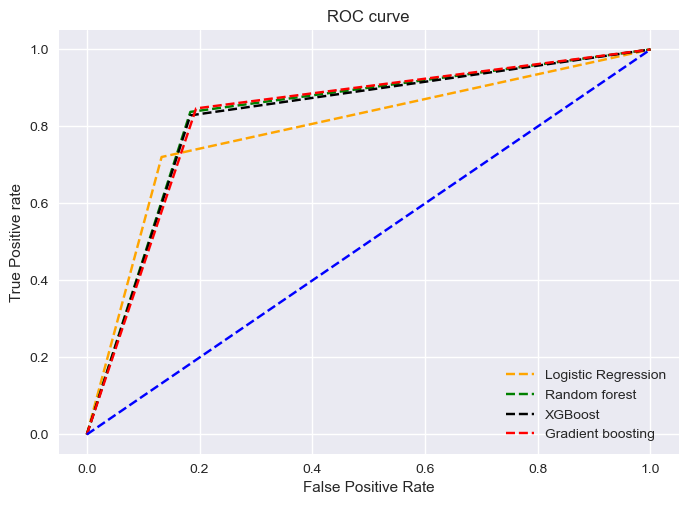

In [60]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='XGBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Gradient boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [61]:
train = pd.read_csv("bank.csv",sep=';')
test = pd.read_csv("test.csv",sep=',')
test.drop('Id',axis=1,inplace = True)
train['type'] = "train"
test['type'] = "test"
data = pd.concat([test,train])
data.head(3)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,type,y
0,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,test,NaN
1,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,test,NaN
2,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,test,NaN
3,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,test,NaN
4,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,train,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,train,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,train,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,train,no


In [62]:
columnss = ['job', 'marital', 'education', 'loan', 'contact','month', 'poutcome','housing']
data2 = data.drop(columns=['default','balance','day','campaign'])

data2 = pd.get_dummies(data2,columns = columnss,drop_first=True)
data2.shape
# data1.shape

(4948, 40)

In [63]:
data2 = data2[data2['type']=='test']

In [64]:
test_df = data2.drop(columns=['type','y'],axis=1)

In [65]:
test_df.shape

(427, 38)

## Observation

- Random Forest using RandomCV with downsampling gives the best results. 
- so we use this model for prediction.
- we used SMOTE and downsampling to over come the problem of data imbalance.
- the models trained on downsampling performed better.

In [67]:
randomf_cv.predict(test_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,